In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("Credit_Card_Applications.csv")
data.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [2]:
X=data.iloc[:,:-1].values
Y=data.iloc[:,-1].values

In [3]:
#Featue Scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range= (0,1))
X=sc.fit_transform(X)

In [4]:
#Training the SOM
from minisom import MiniSom

In [5]:
som= MiniSom(x=10,y=10,input_len= 15,sigma=1.0,learning_rate=0.5)

In [6]:
som.random_weights_init(X)
som.train_random(data= X,num_iteration = 20)

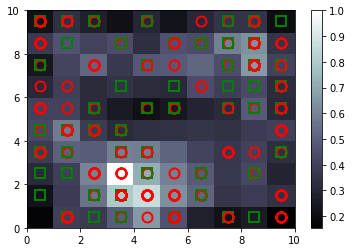

In [12]:
from pylab import bone,pcolor,colorbar,plot,show
bone()
pcolor(som.distance_map().T)
colorbar()
markers=['o','s']
colors=['r','g']
for i,x in enumerate(X):
    w= som.winner(x)
    plot(w[0]+0.5,
         w[1]+0.5,
        markers[Y[i]],
        markeredgecolor=colors[Y[i]],
        markerfacecolor='None',
        markersize=10,
        markeredgewidth=2)
show()

In [13]:
mappings=som.win_map(X)

In [14]:
frauds = mappings[(3,4)]
print(frauds)

[array([0.16927149, 1.        , 0.40857143, 0.08035714, 0.        ,
       1.        , 0.875     , 0.35087719, 1.        , 0.        ,
       0.        , 1.        , 0.5       , 0.088     , 0.        ]), array([5.20884639e-02, 1.00000000e+00, 8.52631579e-02, 5.35714286e-02,
       0.00000000e+00, 9.23076923e-01, 3.75000000e-01, 7.01754386e-02,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       5.00000000e-01, 5.00000000e-02, 2.00000000e-04]), array([0.10168222, 1.        , 0.27443609, 0.0625    , 0.        ,
       0.69230769, 0.875     , 0.00140351, 1.        , 0.        ,
       0.        , 1.        , 0.5       , 0.1965    , 0.        ])]


In [15]:
frauds=sc.inverse_transform(frauds)
print(frauds)

[[1.5607986e+07 1.0000000e+00 4.0920000e+01 2.2500000e+00 1.0000000e+00
  1.4000000e+01 8.0000000e+00 1.0000000e+01 1.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 2.0000000e+00 1.7600000e+02 1.0000000e+00]
 [1.5578722e+07 1.0000000e+00 1.9420000e+01 1.5000000e+00 1.0000000e+00
  1.3000000e+01 4.0000000e+00 2.0000000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 2.0000000e+00 1.0000000e+02 2.1000000e+01]
 [1.5591107e+07 1.0000000e+00 3.2000000e+01 1.7500000e+00 1.0000000e+00
  1.0000000e+01 8.0000000e+00 4.0000000e-02 1.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 2.0000000e+00 3.9300000e+02 1.0000000e+00]]
